In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [78]:
mpg_data=pd.read_csv("C:\\Users\\Hi\\Downloads\\autompg.csv",na_values=['?'])

In [79]:
mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [84]:
data_copy=mpg_data

In [85]:
data_copy

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [86]:
data_copy.drop("car name",axis=1,inplace=True)

In [87]:
data_copy.info

<bound method DataFrame.info of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model year  origin  
0            70       1  
1            70       1  
2            70       1  

In [88]:
data_copy.shape

(398, 8)

In [89]:
data_copy["origin"].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [90]:
data_copy.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       91
weight          351
acceleration     95
model year       13
origin            3
dtype: int64

In [91]:
# Preprocessing
data_copy.isnull().sum()

mpg              0
cylinders        0
displacement     0
horsepower      12
weight           0
acceleration     0
model year       0
origin           0
dtype: int64

In [92]:
#here you have 12 horse power in null values
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

data_imputed = pd.DataFrame(my_imputer.fit_transform(data_copy), columns = data_copy.columns)

In [93]:
data_imputed.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [95]:
x=data_imputed.drop(columns="mpg",axis=1)

In [96]:
x.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [97]:
y=data_imputed["mpg"]

In [98]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [100]:
x.shape

(398, 7)

In [101]:
y = data_imputed[['mpg']].values.reshape(398, 1)

In [102]:
y.shape

(398, 1)

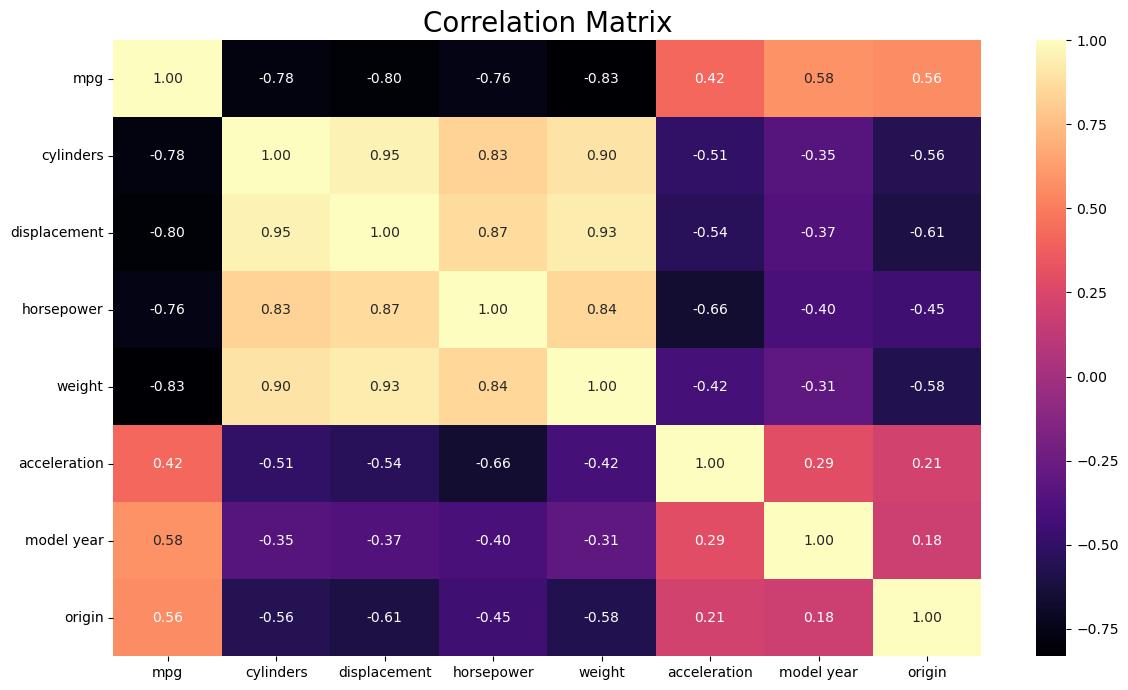

In [105]:
#EDA
f, ax = plt.subplots(figsize= [14, 8])
sns.heatmap(data_imputed.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

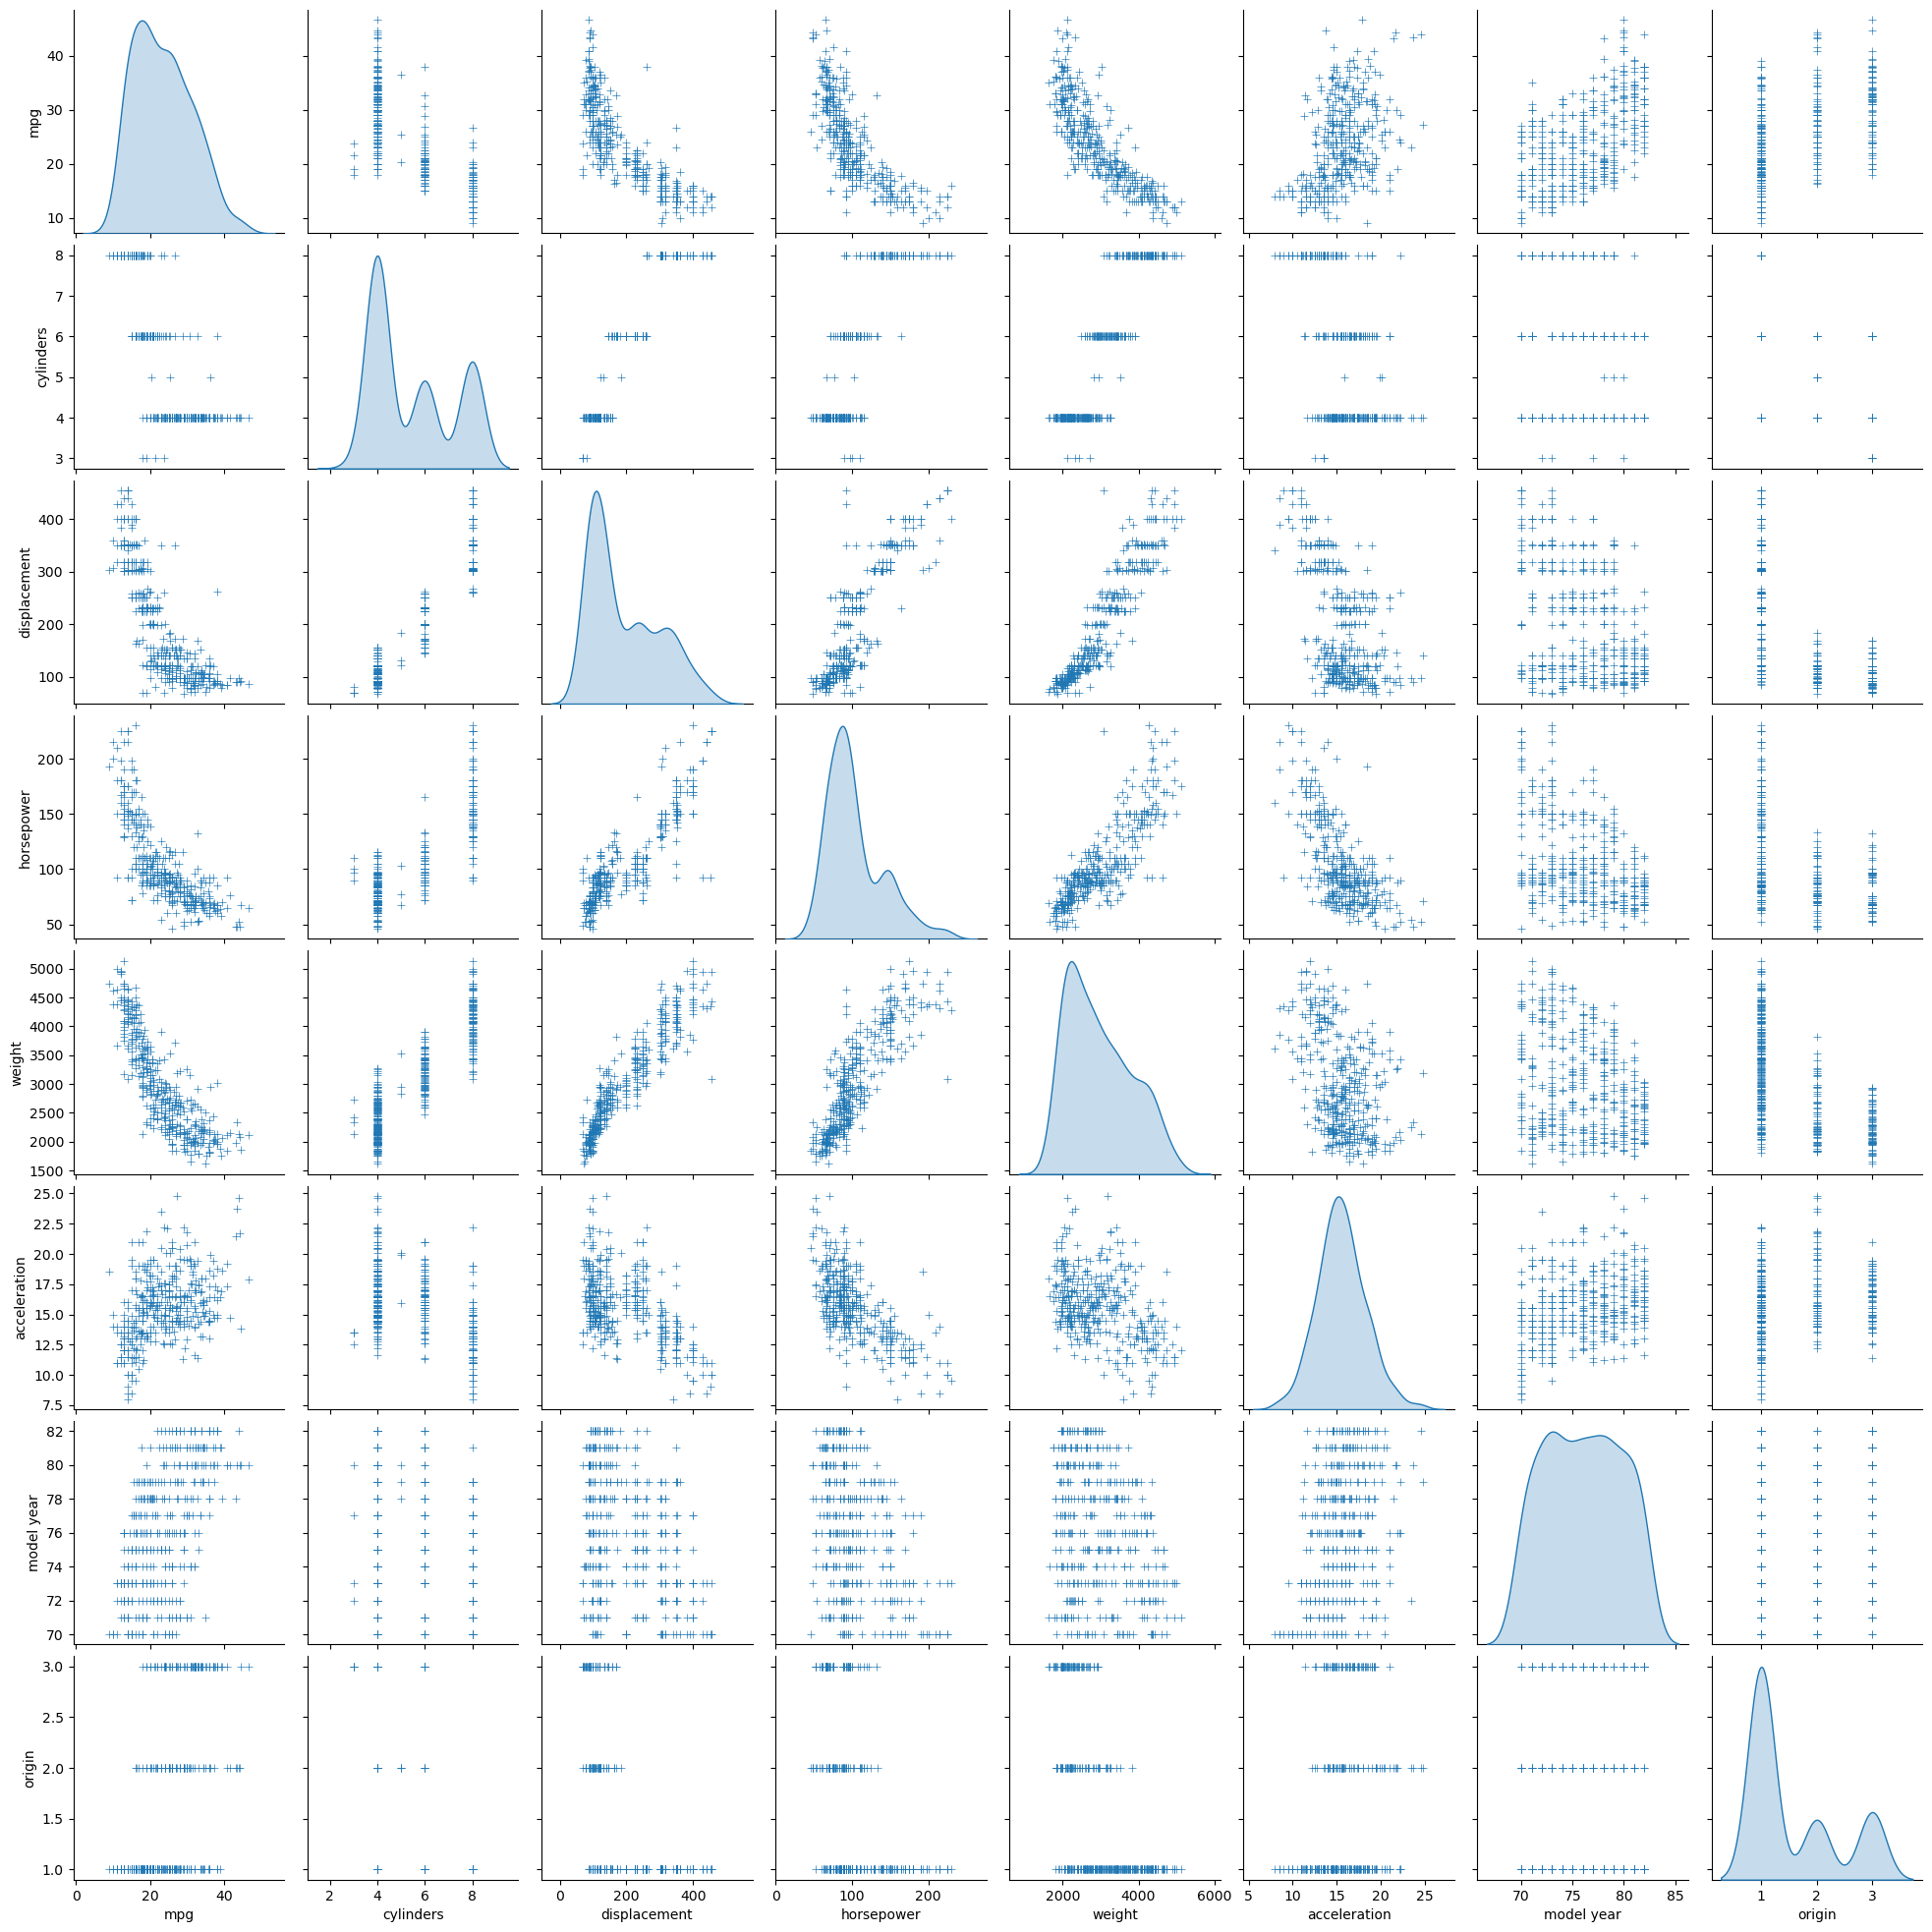

In [106]:
sns.pairplot(data_imputed, diag_kind='kde', markers='+')

<Axes: xlabel='origin', ylabel='mpg'>

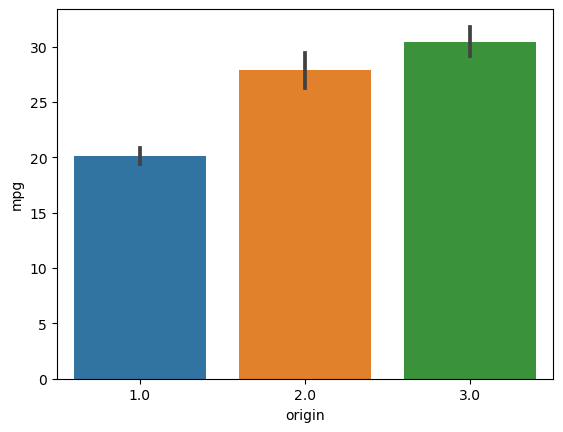

In [107]:
#here 1.USA,2.Japan,3.Europe based on the dataset
sns.barplot(x="origin", y="mpg",data=data_imputed)

Text(0.5, 1.0, 'Consumption Gallon by Years')

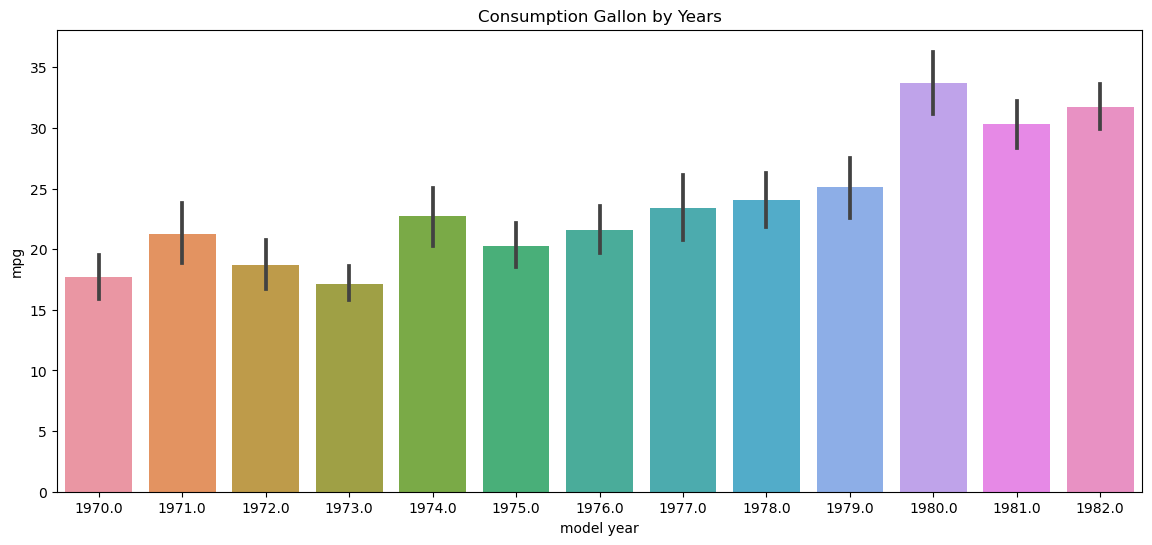

In [109]:
plt.figure(figsize=[14,6])
sns.barplot(x=data_imputed["model year"]+1900,y=data_imputed["mpg"])
plt.title("Consumption Gallon by Years")

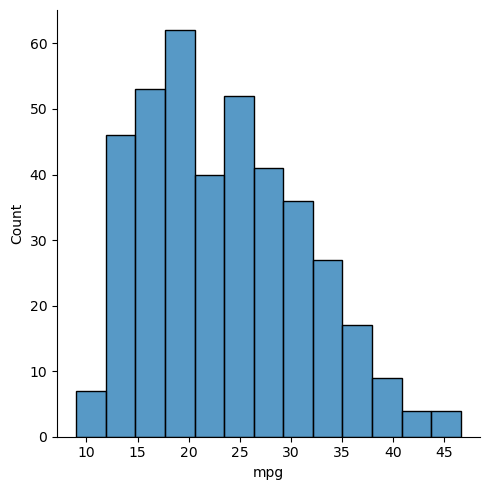

In [110]:
sns.displot(data_imputed["mpg"])

<Axes: xlabel='mpg', ylabel='Density'>

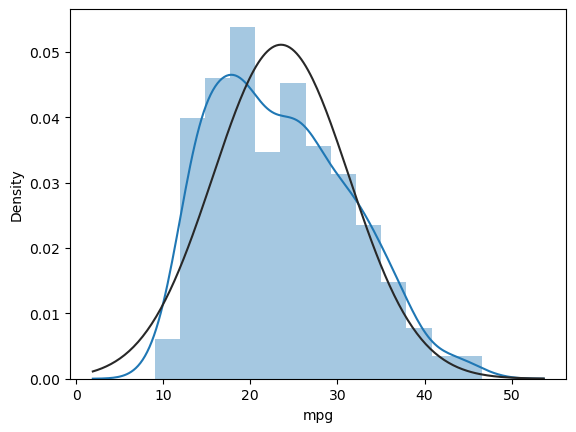

In [113]:
sns.distplot(data_imputed["mpg"],fit=norm)

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [120]:
from sklearn import linear_model
model = linear_model.LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [121]:
print("Coefficient:    ",model.coef_[0])

Coefficient:     [-0.43855667  0.01973109 -0.01206817 -0.00664874  0.12695049  0.74527598
  1.62919437]


In [123]:
print("Intercept:     ",model.intercept_[0])

Intercept:      -18.12283533356429


In [124]:
y_pred = model.predict(x_test)

In [125]:
y_pred

array([[30.30500131],
       [26.73293245],
       [24.21927854],
       [13.98799892],
       [17.34965288],
       [21.89374204],
       [10.47297072],
       [25.22621427],
       [31.41575898],
       [16.45579764],
       [ 9.0135722 ],
       [11.78378634],
       [22.26008522],
       [24.9590648 ],
       [30.69288163],
       [23.77313388],
       [28.60144445],
       [29.20722255],
       [18.7211529 ],
       [31.23629709],
       [15.53011427],
       [28.20443507],
       [25.95852575],
       [27.74117716],
       [29.54987868],
       [34.62838361],
       [27.05628045],
       [15.63684273],
       [15.10931577],
       [18.94321517],
       [17.26709149],
       [12.20278293],
       [32.16387563],
       [31.65633088],
       [31.91383631],
       [30.37402696],
       [14.88203476],
       [20.29971726],
       [36.71360569],
       [25.45448247],
       [14.44956095],
       [16.6049238 ],
       [36.59412745],
       [24.39642732],
       [20.39346359],
       [15

In [129]:
#prediction with new value
print(model.predict([[8,350,165,3693,11.5,70,1]]))

[[13.98799892]]


In [130]:
print("R2 Score",r2_score(y_test, y_pred))

R2 Score 0.8467355330006572
